## 26. Нелинейный метод наименьших квадратов. Светимость звезды
[Каханер–Моулер–Нэш]
Сверхновой звезде типа I соответствует специальная модель светимости. Спустя несколько дней после максимума светимости эту модель
можно описать так:
$$
L(t) = C_1 e^{-t/\alpha_1} + C_2 e^{-t/\alpha_2},
$$
где $t$ – время (в днях) с момента максимальной светимости,
а $L(t)$ – светимость, относительно максимальной светимости.
В таблице ниже приведены данные по относительной светимости для свехновой I939A6, полученные в 1936 г.
Пик светимости приходится на день $0$, но наблюдения до дня $7.0$, опущены, так какуказанная модель не описывает
светимости перед и непосредственно после максимума.


```
    t      L(t)    
--------------------
   7.0    0.6310     
   7.0    0.8318     
  14.8    0.2754     
  16.0    0.1445     
  16.9    0.2089     
  17.0    0.1585     
  18.8    0.1585     
  19.0    0.1318     
  20.9    0.1585     
  15.8    0.1096     
  16.8    0.1445     
  28.0    0.09120    
  53.0    0.06310    
  54.0    0.06918    
  57.0    0.05754    
  85.0    0.03631    
 109.0    0.02291    
 110.0    0.02291    
 141.0    0.01738    
 142.0    0.01585    
 168.0    0.009120   
```

Нанести данные на график.
Нелинейным методом наименьших квадратов найдите неизвестные параметры модели и постройте графики.
Используйте различные начальные значения для $\alpha_1$, $\alpha_2$, $C_1$, $C_2$.
Чему равна результирующая суммарная ошибка?
Рассмотрите также аппроксимацию одной экспонентой - решите эту задачу сведя ее к линейной задаче наименьших квадратов.
Сравните все результаты.
Насколько чувствительны результирующие значения к начальным значениям?

1. Нанести данные на график.

Для начала подключаем бибилиотеку numPy для использования массивов и некоторых математических функций и matplotlib.pyplot для построения графиков. Далее подключаем пакет linalg из библиотеки sciPy и пакет curve_fit из библиотеки sciPy.optitmize для поиска неизвестных параметров с помощью метода нелинейных квадратов.

Заполняем массив х и y данными из условия и наносим их на график.

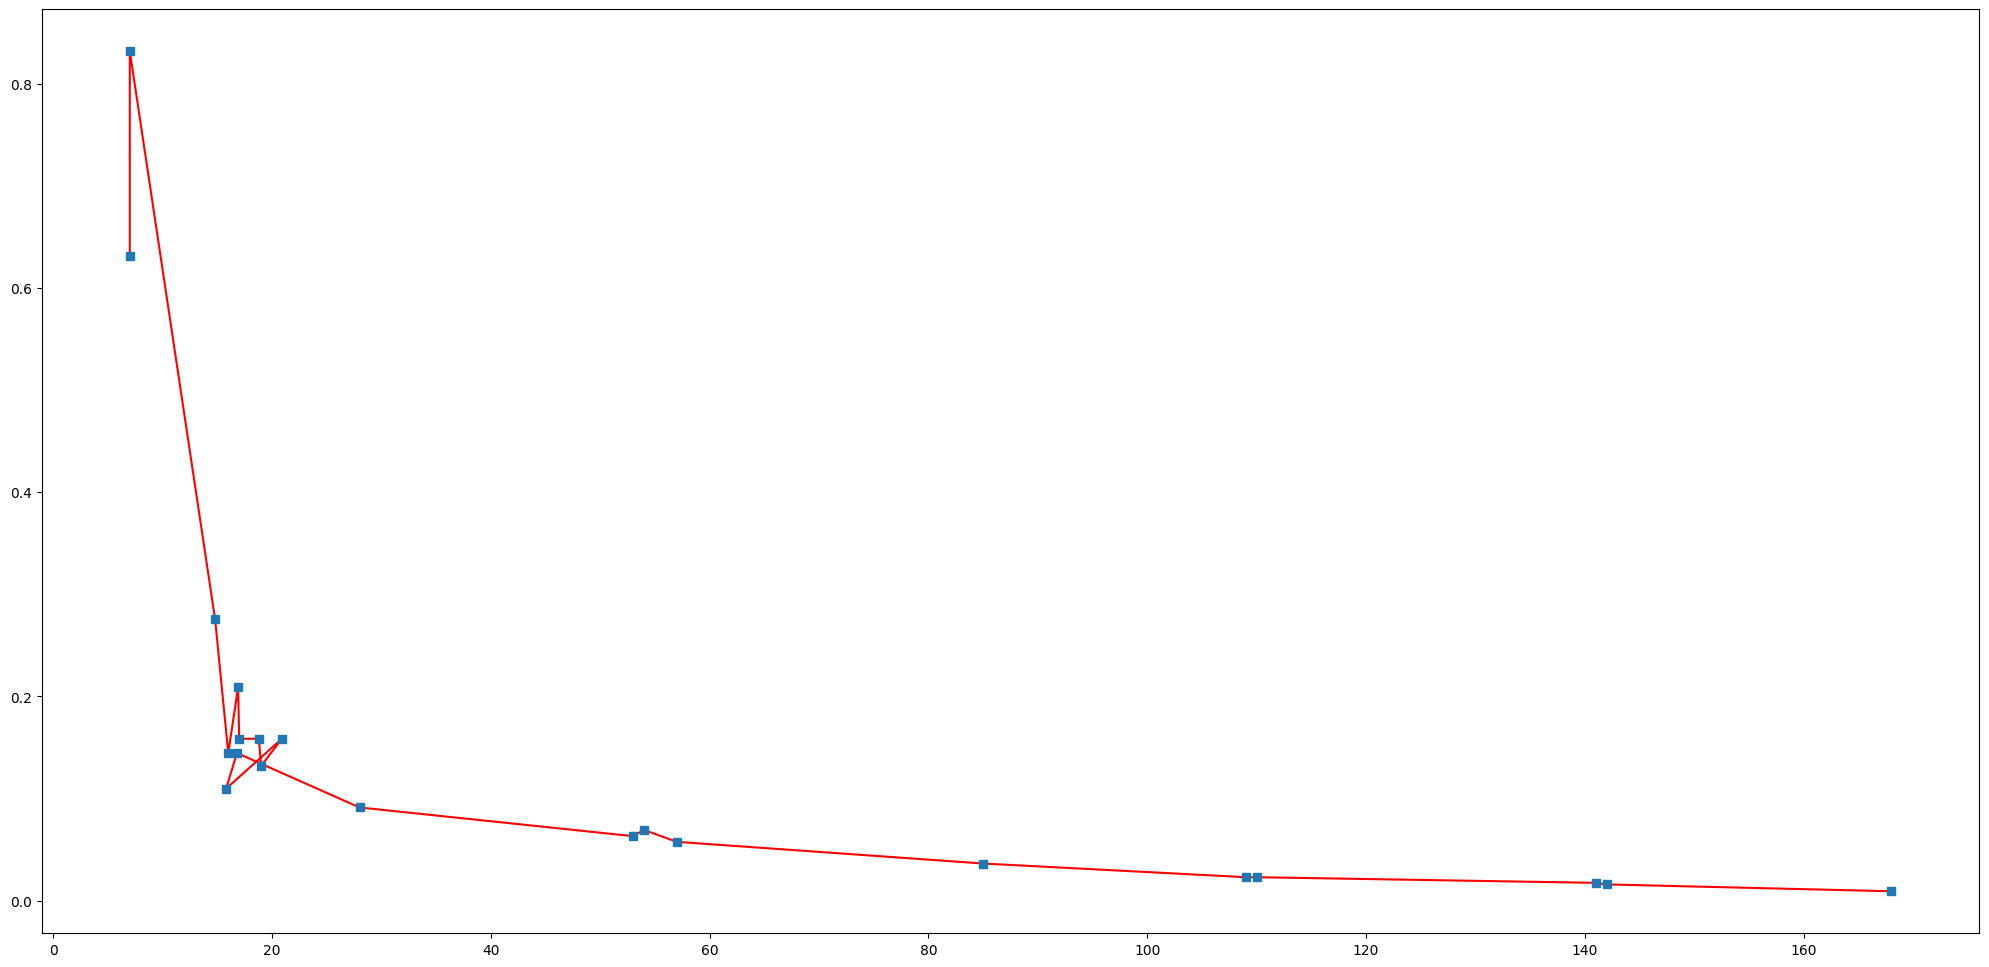

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error

x = np.array([7.0, 7.0, 14.8, 16.0, 16.9, 17.0, 18.8, 19.0, 20.9, 15.8, 16.8, 28.0, 53.0, 54.0, 57.0, 85.0, 109.0, 110.0, 141.0, 142.0, 168.0])
y = np.array([0.6310, 0.8318, 0.2754,  0.1445, 0.2089, 0.1585, 0.1585, 0.1318, 0.1585, 0.1096, 0.1445, 0.09120, 0.06310, 0.06918, 0.05754, 0.03631, 0.02291, 0.02291, 0.01738, 0.01585, 0.009120])

fig = plt.figure()
fig.set_size_inches(25, 12)

plt.plot(x, y, 'r')
plt.plot(x, y, 's')

pass



2. Нелинейным методом наименьших квадратов найдите неизвестные параметры модели и постройте графики

Алгоритм Левенберга — Марквардта является нелинейным методом наименьших квадратов (этот метод позволяет минимизировать сумму квадратов отклонений модели от фактических данных).

Даем начальные значения параметрам С1, C2, a1, a2, определяем функцию модели светимости звезды. Затем применяем нелинейный метод наименьших квадратов для определения неизвестных параметров модели и строим график

<ipython-input-4-962a48a0f3f8>:7: RuntimeWarning: invalid value encountered in power
  return (C1 * e)**((-1)*x/a1) + (C2 * e)**((-1)*x/a2)


array([0.5111685 , 0.54530208, 1.89035228, 3.17950784])

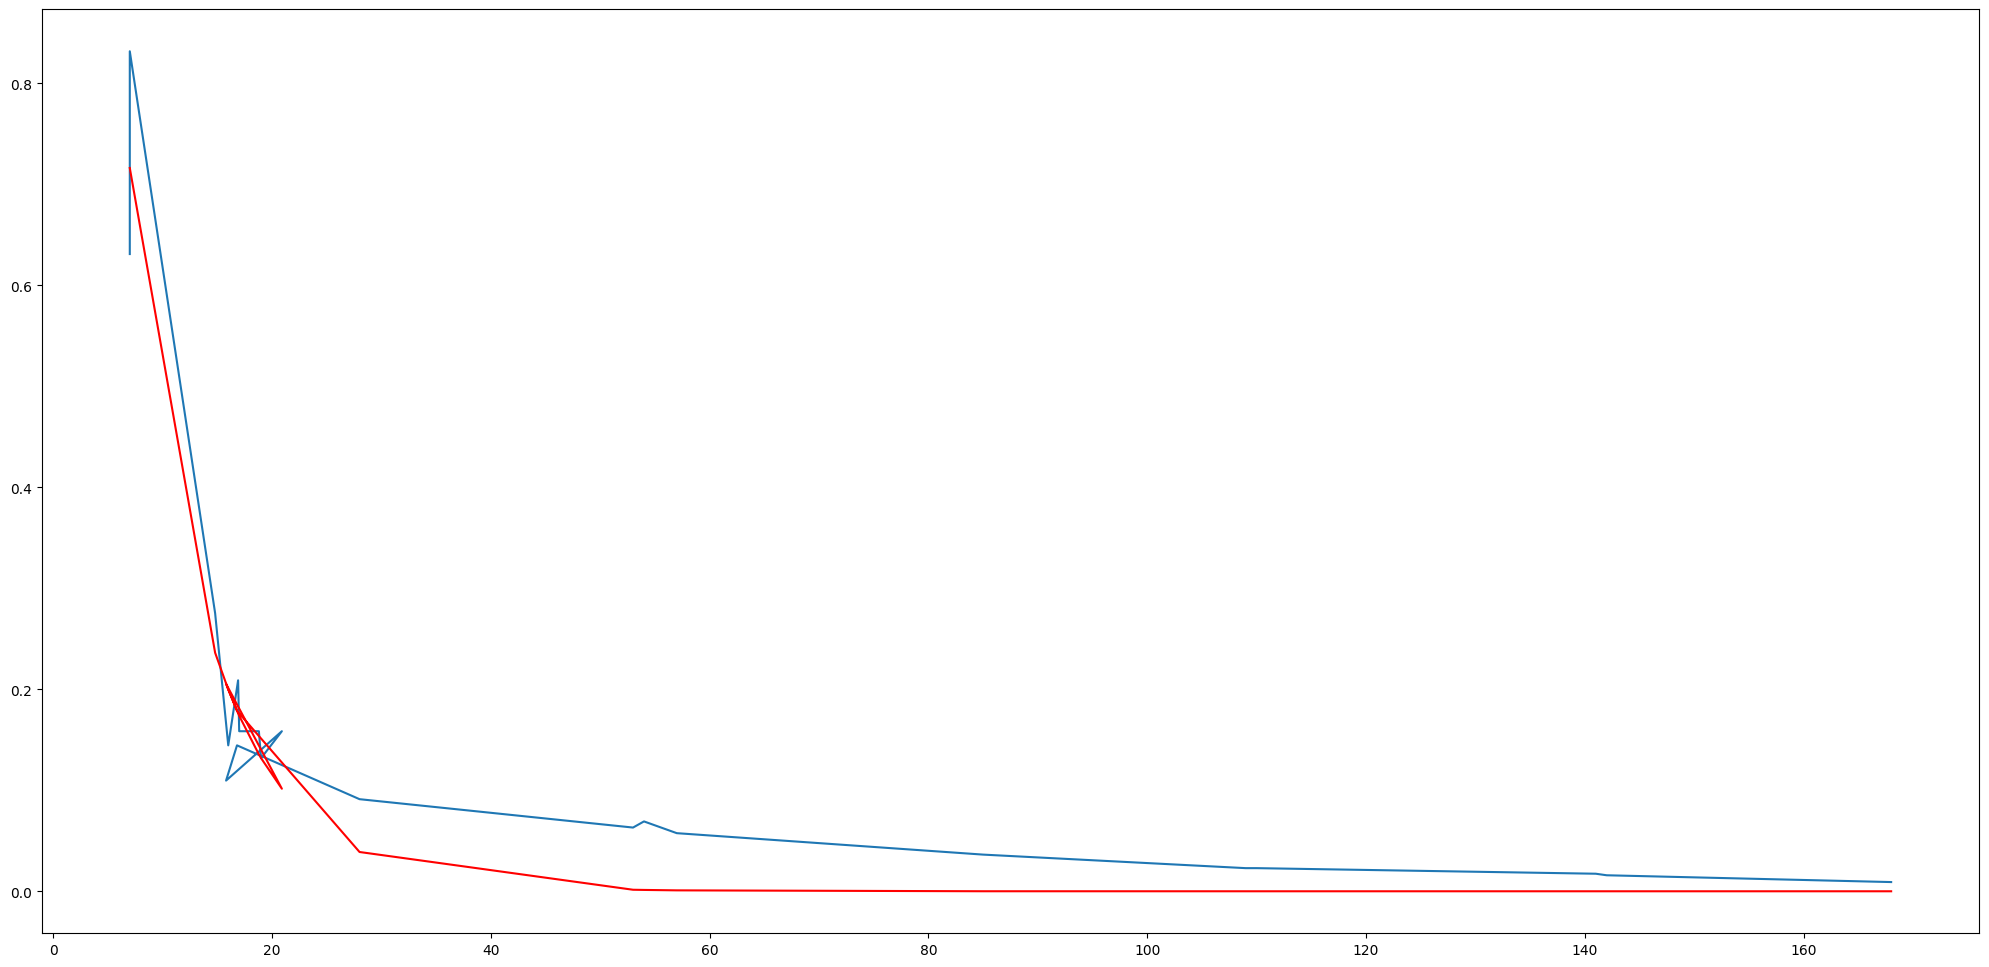

In [ ]:
C1 = 1
C2 = 1
a1 = 1
a2 = 1
e = 2.718281
def model(x, C1, C2, a1, a2):
  return (C1 * e)**((-1)*x/a1) + (C2 * e)**((-1)*x/a2)

params, cov = curve_fit(model, x, y, p0=[C1, C2, a1, a2])
C1_fit, C2_fit, a1_fit, a2_fit = params

fig = plt.figure()
fig.set_size_inches(25, 12)
plt.plot(x, y)
plt.plot(x, model(x, C1_fit, C2_fit, a1_fit, a2_fit), 'r')
params



Оптимальные значения для параметров С1, C2, a1, a2:  0.5111685 , 0.54530208, 1.89035228, 3.17950784
3. Построим еще несколько графиков, используя различные начальные значения

<ipython-input-4-962a48a0f3f8>:7: RuntimeWarning: invalid value encountered in power
  return (C1 * e)**((-1)*x/a1) + (C2 * e)**((-1)*x/a2)


array([ 4.08192373,  0.83373234, 13.82999641,  6.60933119])

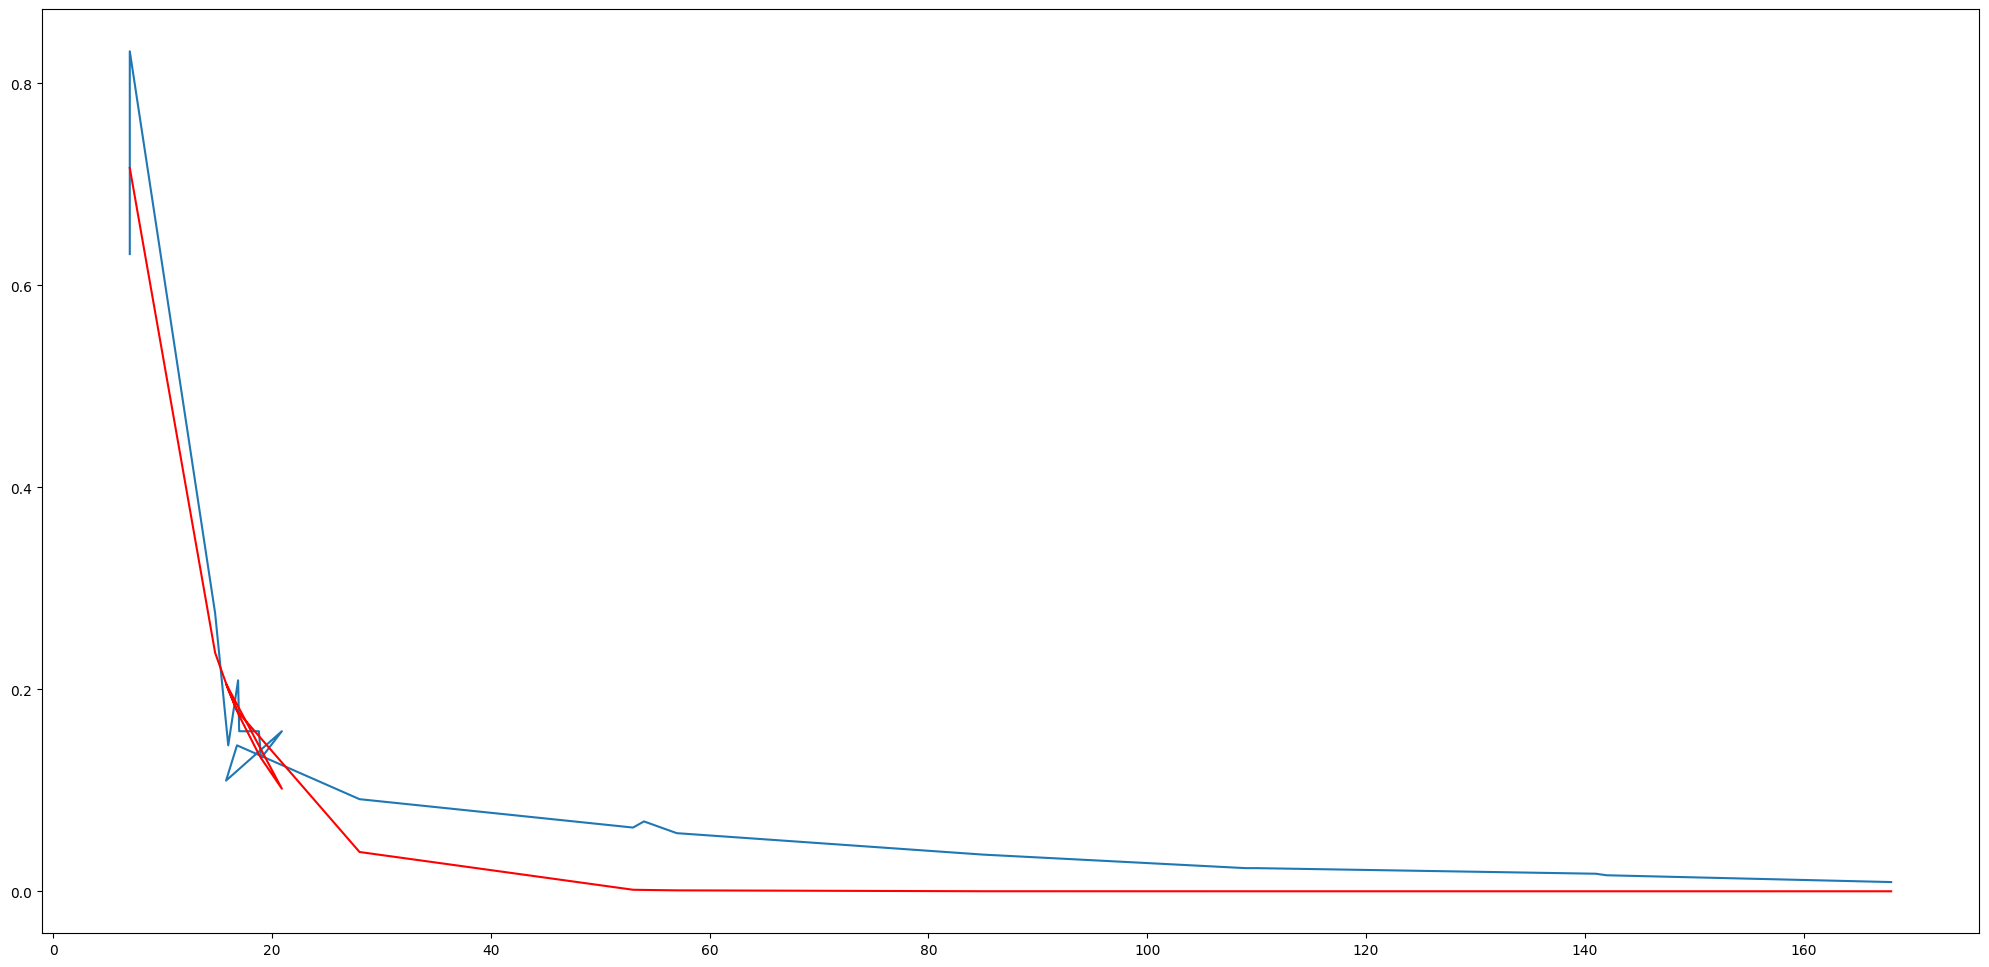

In [ ]:
C1 = max(y)
C2 = min(y)
a1 = 500
a2 = 1000
e = 2.718281
params, cov = curve_fit(model, x, y, p0=[C1, C2, a1, a2])
C1_fit, C2_fit, a1_fit, a2_fit = params

fig = plt.figure()
fig.set_size_inches(25, 12)
plt.plot(x, y)
plt.plot(x, model(x, C1_fit, C2_fit, a1_fit, a2_fit), 'r')
params

<ipython-input-4-962a48a0f3f8>:7: RuntimeWarning: invalid value encountered in power
  return (C1 * e)**((-1)*x/a1) + (C2 * e)**((-1)*x/a2)


array([1.45425514, 1.04352899, 7.89887136, 8.42257204])

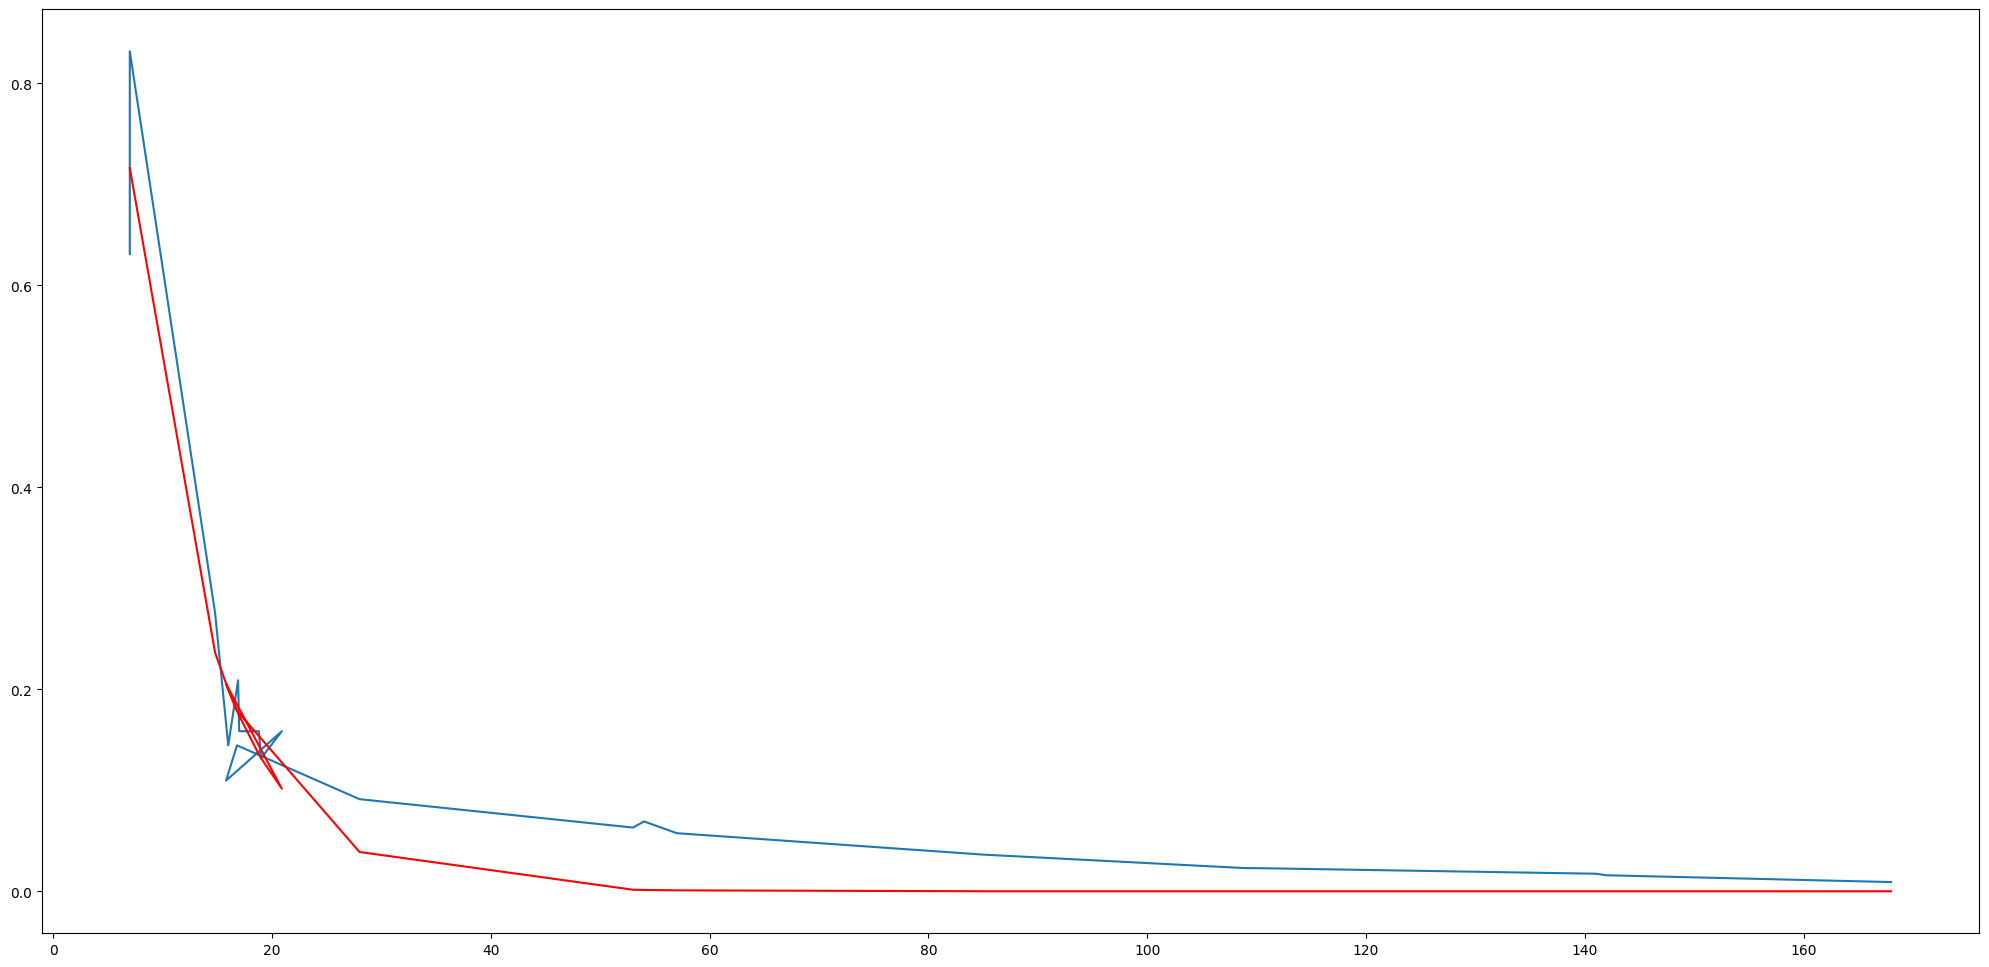

In [ ]:
C1 = 5
C2 = 1
a1 = 5
a2 = 10
e = 2.718281
params, cov = curve_fit(model, x, y, p0=[C1, C2, a1, a2])
C1_fit, C2_fit, a1_fit, a2_fit = params

fig = plt.figure()
fig.set_size_inches(25, 12)
plt.plot(x, y)
plt.plot(x, model(x, C1_fit, C2_fit, a1_fit, a2_fit), 'r')
params

<ipython-input-4-962a48a0f3f8>:7: RuntimeWarning: invalid value encountered in power
  return (C1 * e)**((-1)*x/a1) + (C2 * e)**((-1)*x/a2)


array([ 2.14678808,  1.17937768, 10.1370198 ,  9.41123546])

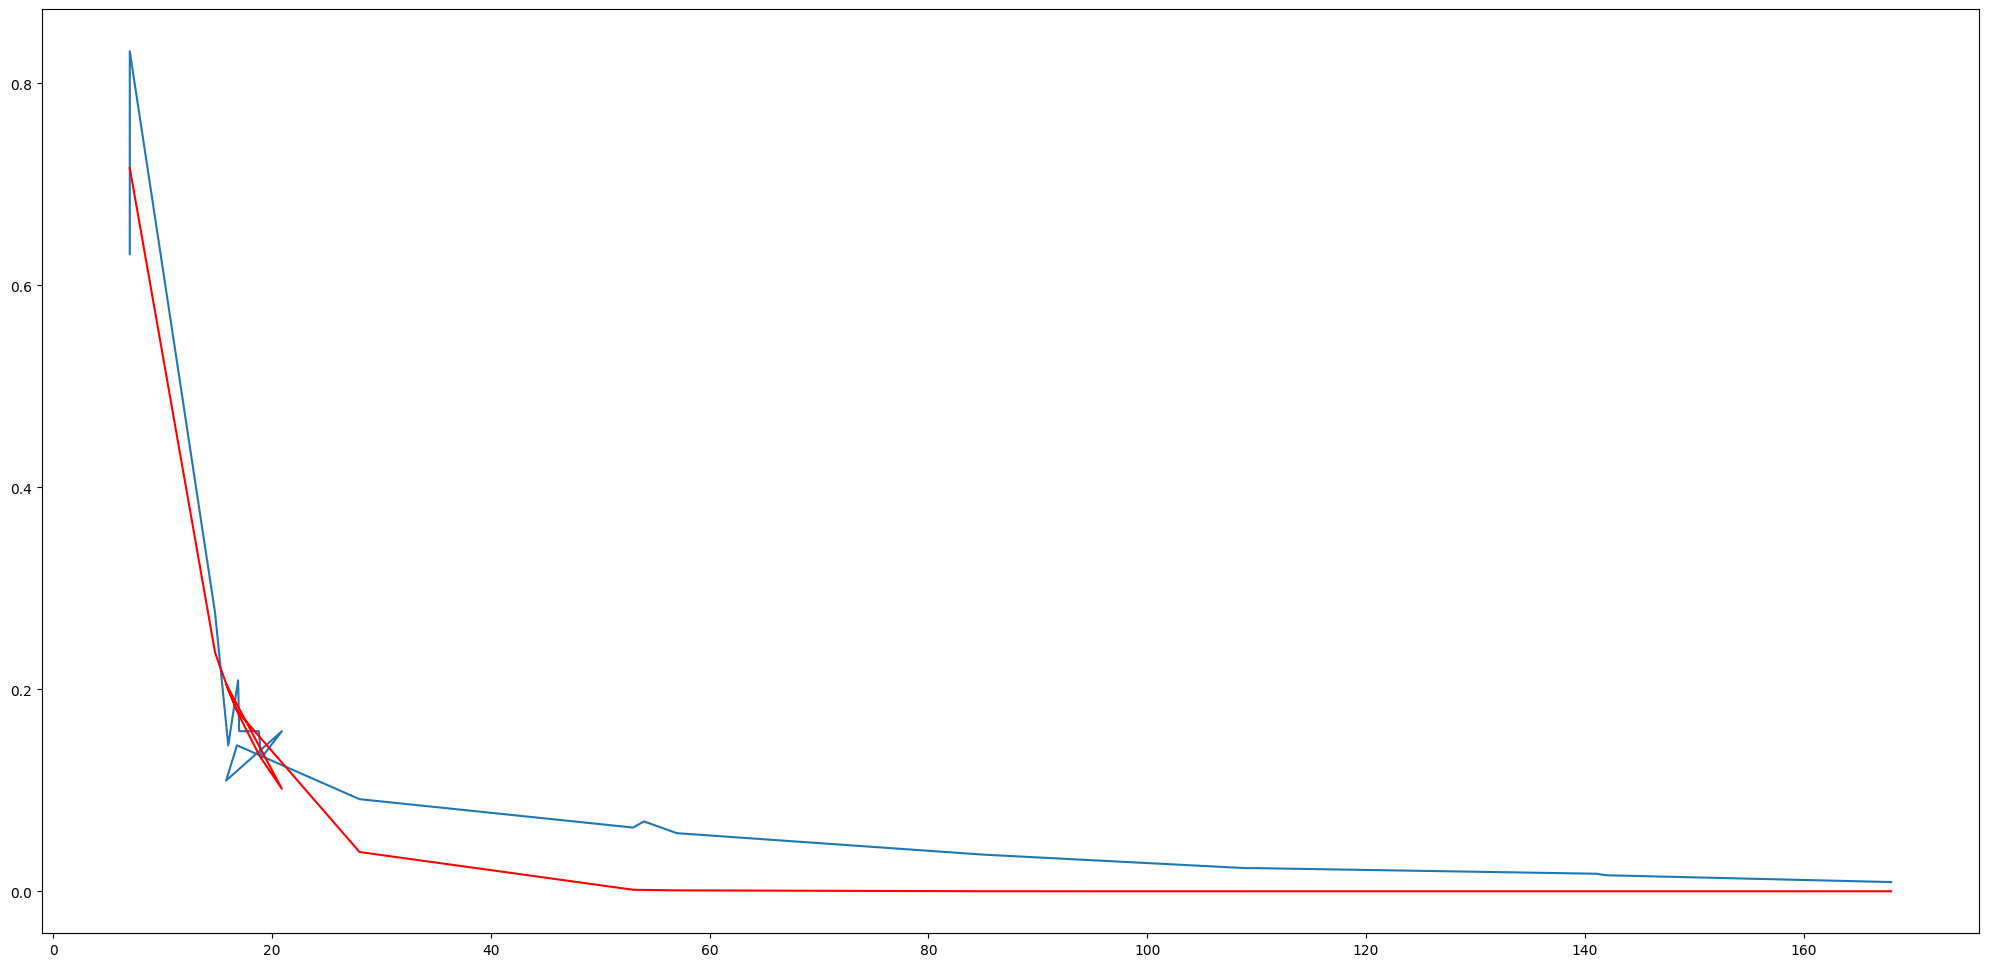

In [ ]:
C1 = 10
C2 = 1
a1 = 5
a2 = 10
e = 2.718281
params, cov = curve_fit(model, x, y, p0=[C1, C2, a1, a2])
C1_fit, C2_fit, a1_fit, a2_fit = params

fig = plt.figure()
fig.set_size_inches(25, 12)
plt.plot(x, y)
plt.plot(x, model(x, C1_fit, C2_fit, a1_fit, a2_fit), 'r')
params

4. Вычисляем суммарную ошибку. Из значений функции, полученной в результате применения нелинейного метода наименьших квадратов, вычитаем значения функции взятые из таблицы:

In [ ]:
y_fit = model(x, C1_fit, C2_fit, a1_fit, a2_fit)
error = np.sum((y - y_fit) ** 2)
error

0.057973994597634616

Также значение суммарной ошибки можно вычислить с помощью функции mean_squared_error() из библиотеки sklearn.metrics. 

In [ ]:
y1 = model(x, C1, C2, a1, a2)
error = mean_squared_error(y, y1)
error

0.007389434836220656

5. Теперь рассмотрим аппроксимацию с применением уже вычисленныч ранее параметров для С1, а1, С2, а2

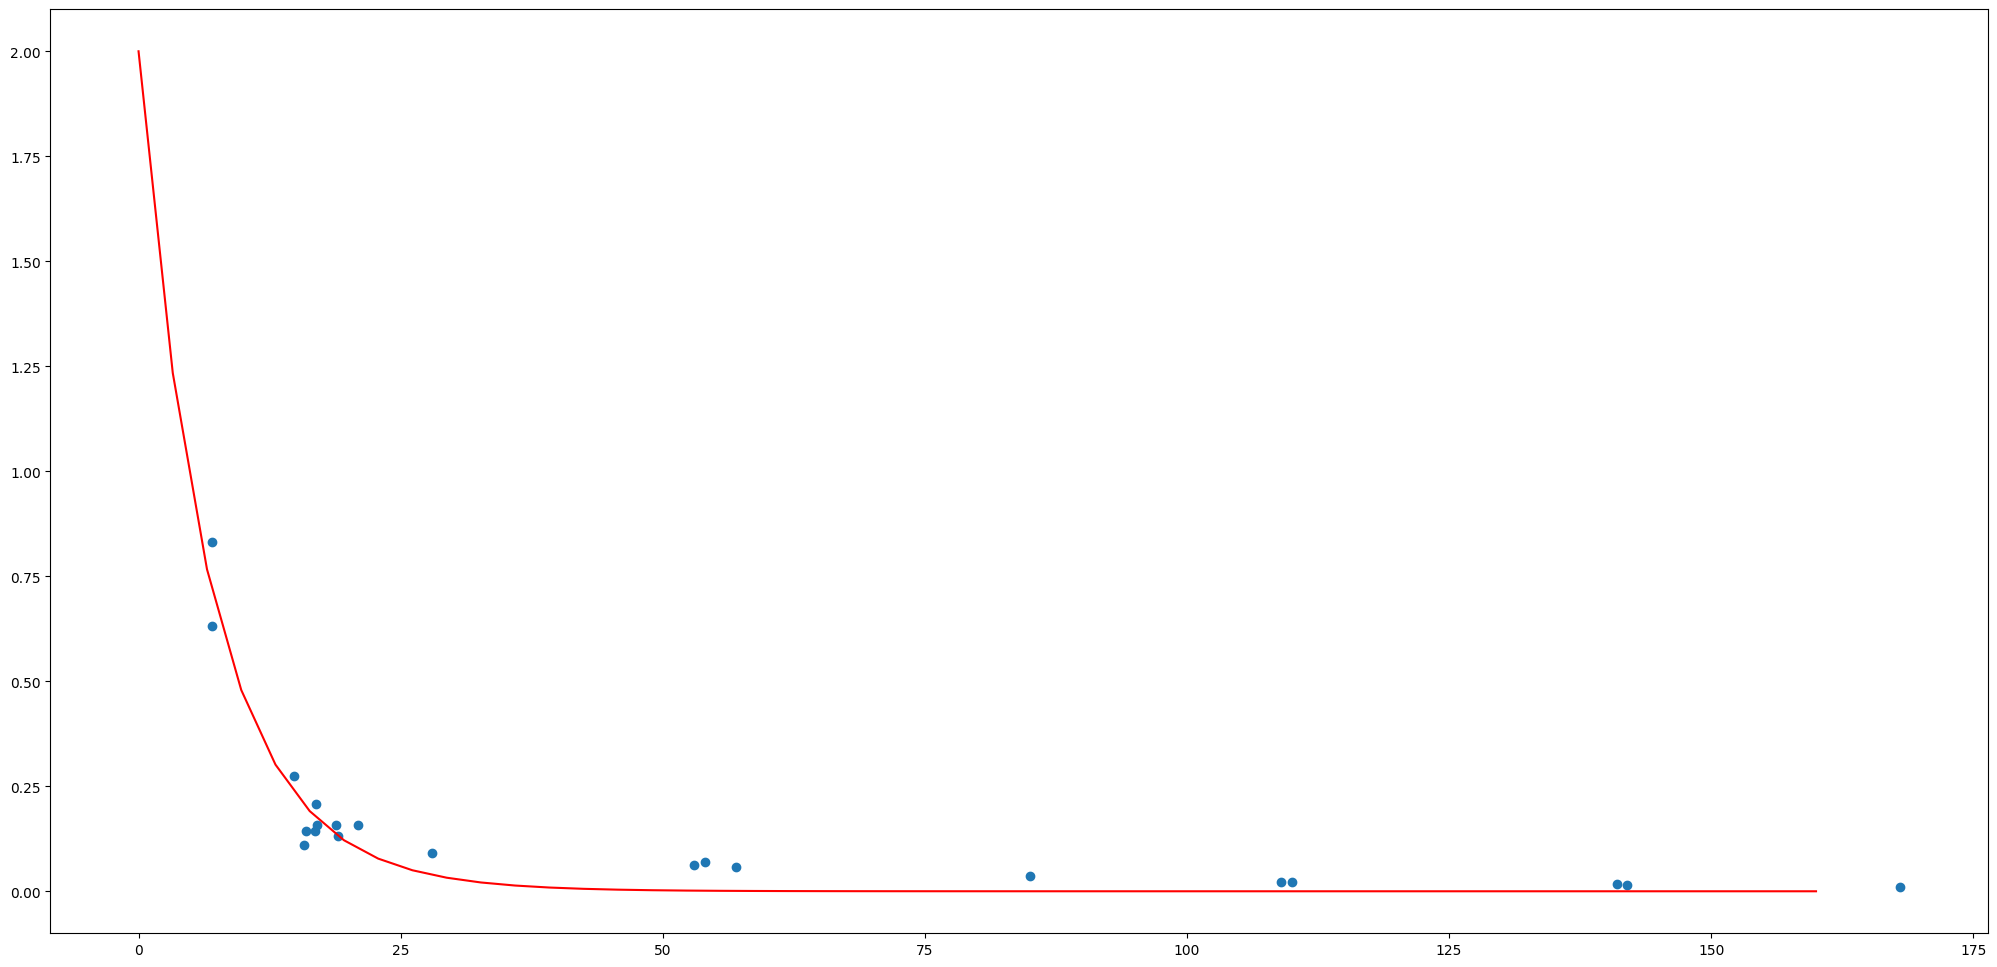

In [ ]:
x_fit = np.linspace(0, 160)
y_fit = model(x_fit, *params)

fig = plt.figure()
fig.set_size_inches(25, 12)
plt.scatter(x, y)
plt.plot(x_fit, y_fit, color='red')


Найдем суммарную ошибку

In [ ]:
y1 = model(x_fit, C1, C2, a1, a2)
error = mean_squared_error(y_fit, y1)
error

0.00675522183955998

Теперь рассмотрим аппроксимацию одной экспонентой - сведем задачу к линейному методу наименьших квадратов, воспользуемся линейной регрессией

<ipython-input-15-d2555fbf6b04>:2: RuntimeWarning: invalid value encountered in power
  return (C1*e)**(-x/a1)


array([7.33933081, 0.71215269])

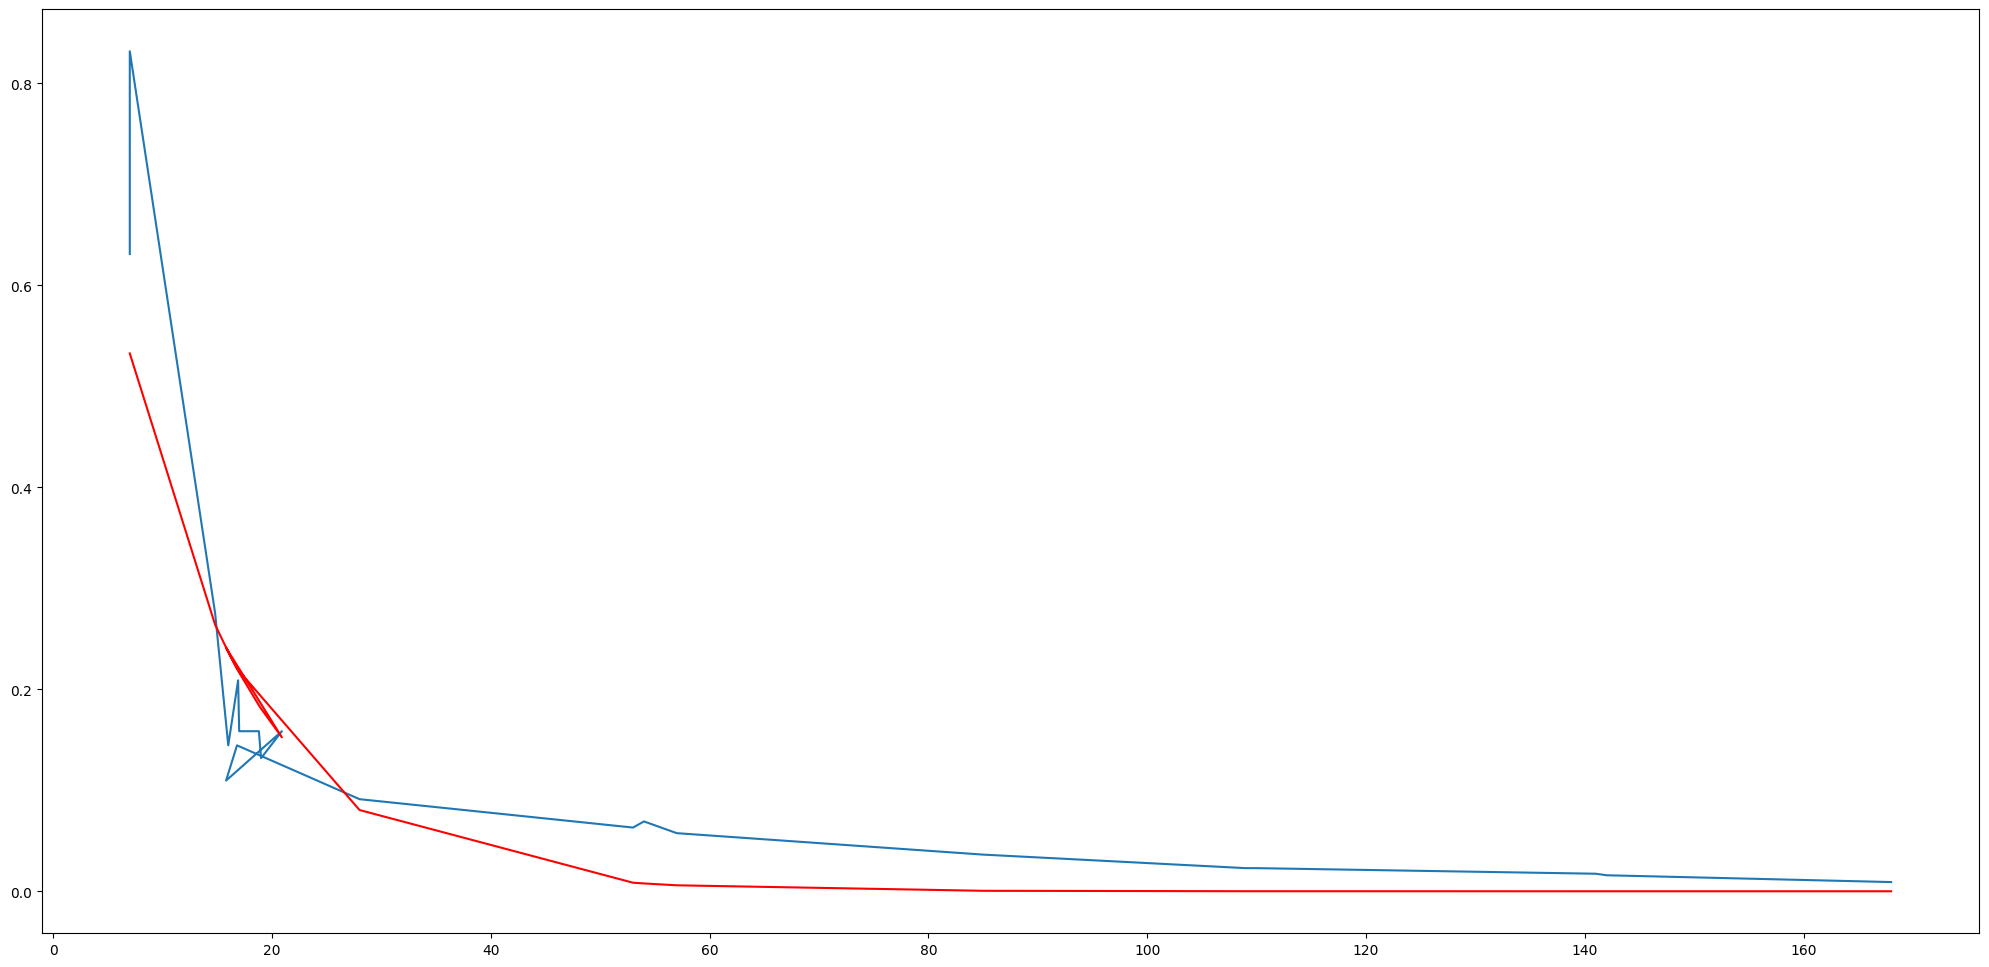

In [ ]:
def model_apr(x, a1, C1):
    return (C1*e)**(-x/a1)

C1 = 10
a1 = 1

popt, pcov = curve_fit(model_apr, x, y, p0 = [10, 1])
C1_apr, a1_apr = popt

fig = plt.figure()
fig.set_size_inches(25, 12)
plt.plot(x, y)
plt.plot(x, model_apr(x, C1_apr, a1_apr), 'r')

popt

In [ ]:
y_apr = model_apr(x, C1, a1)
error = mean_squared_error(y, y_apr)
error

0.007819135909144488

Таким образом, исходя из результатов можно сделать вывод, что значение ошибки при аппроксимации  единственной экспонентой больше, чем при использовании двух экспонент. Так получается изза того, что точность апроксимации уменбшается, при уменьшении количества параметров

Значения параметров и ошибка в нелинейного метода наименьших квадратов значительно зависят от различных начальных значений. Итак, для наиболее точных результатов следует делать многократную оптимизацию с различными начальными значениями и выбирать наилучший результат.